# Understanding the content of the competition

#What kind of company is Home Credit?

- Home Credit is an international consumer finance provider with operations in eight countries. The company was founded in 1997 in Czech Republic as a non-banking lender.

- They focus on responsible lending primarily to people with little or no credit history in a simple, fast and easy ways both online and offline.

- Home credit empower people to live the life they want in a responsible manner

#What do you expect from this competition?

- To be able to predict accurately how capable each applicant can pay back a loan granted by Home Credit with availabe data

#What are the company's benefits from predicting it?

- To assess repaayment ability of the borower and determine whether to grant the loan or not

# Preparing dataset

In [2]:
# Loading data
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
record = pd.read_csv("application_train.csv")

In [15]:
record.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
record.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [17]:
record.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [18]:
record.count()

SK_ID_CURR                    307511
TARGET                        307511
NAME_CONTRACT_TYPE            307511
CODE_GENDER                   307511
FLAG_OWN_CAR                  307511
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY     265992
AMT_REQ_CREDIT_BUREAU_WEEK    265992
AMT_REQ_CREDIT_BUREAU_MON     265992
AMT_REQ_CREDIT_BUREAU_QRT     265992
AMT_REQ_CREDIT_BUREAU_YEAR    265992
Length: 122, dtype: int64

In [27]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [28]:
missing_data(record).head()

,Total,Percent
COMMONAREA_MEDI,214865,69.872297
COMMONAREA_AVG,214865,69.872297
COMMONAREA_MODE,214865,69.872297
NONLIVINGAPARTMENTS_MODE,213514,69.432963
NONLIVINGAPARTMENTS_AVG,213514,69.432963


In [30]:
#No. of columns with missing values
record.isnull().any(axis=0).sum()

67

In [31]:
#No. of rows with missing values
record.isnull().any(axis=1).sum()

298909

In [36]:
# Graph showing proportion of classes
x = record.drop(['TARGET'], axis=1)
y = record.loc[:, 'TARGET']

In [37]:
y.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

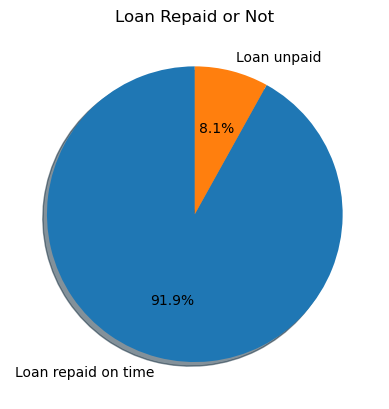

In [40]:
label_counts = y.value_counts()
labels = 'Loan repaid on time', 'Loan unpaid'

plt.title("Loan Repaid or Not")
plt.pie(label_counts, labels=labels, autopct='%.1f%%', shadow=True, startangle=90)
plt.show()

- Approximately 92% of the loan is repaid on time while 8% is not

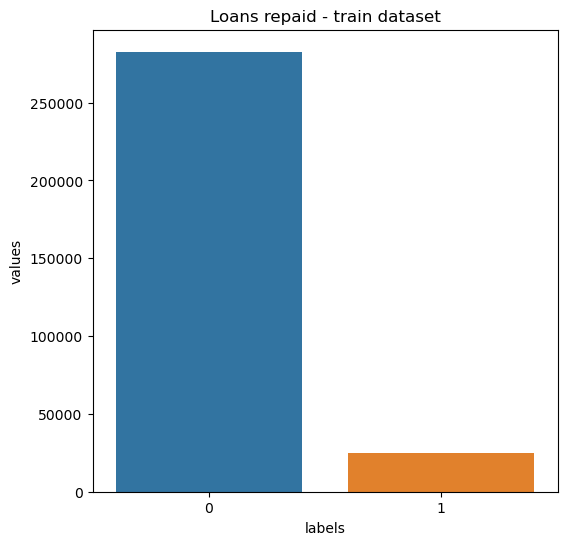

In [43]:
temp = record["TARGET"].value_counts()
df = pd.DataFrame({'labels': temp.index,
                'values': temp.values
                })
plt.figure(figsize = (6,6))
plt.title('Loans repaid - train dataset')
sns.set_color_codes("pastel")
sns.barplot(x = 'labels', y = "values", data=df)
locs, labels = plt.xticks()
plt.show()

# Assignment settings

<ol>
<li>
    Is the clients Single/not, married or divorced?</li>
<li>Does the clients have children?
    </li>
    <li>What is the clients Education Level?</li>
    <li>Does applicants for credits registered their housing as House/apartmen?</li>
    <li>What is the type of income of the clients?</li>
    <li>On which day of the week did the client apply for the loan?</li>
    <li>Does the client owns a car or real estate?</li>
    <li>What is the clients gender?</li>
    <li>Which type of loan did the clients took?</li>
    <li>How much loan did the clients take?</li>
    <li>What is the Normalized population of region where client lives ?</li>
    <li>How many family members does the clients have?</li>
    <li>Who was accompanying client when he was applying for the loan?</li>
    <li>How many rooms are in the house?</li>
    <li>On which day of the week did the client apply for the loan?</li>
    <li>Does the clients have a job?</li>
    <li>What is the job/organization type of the clients?</li>
    <li>What is the Days from birth distribution of the clients?</li>
    <li>What is the distribution of total income for the clients?</li>
    <li>What is the Clients income type (businessman, working, maternity leave)?</li>
    <li>Approximately at what hour did the client apply for the loan?</li>
    <li>In what year the house was built?</li>
    <li>How many observation of client's social surroundings with observable 30 DPD ?</li>
    <li>How many days before application did client change phone?</li>
    <li>Did client provide documents ?</li>
</ol</ol>

# Data search

In [45]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = record[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = record[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

In [46]:
def plot_distribution(var):
    
    i = 0
    t1 = record.loc[record['TARGET'] != 0]
    t0 = record.loc[record['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

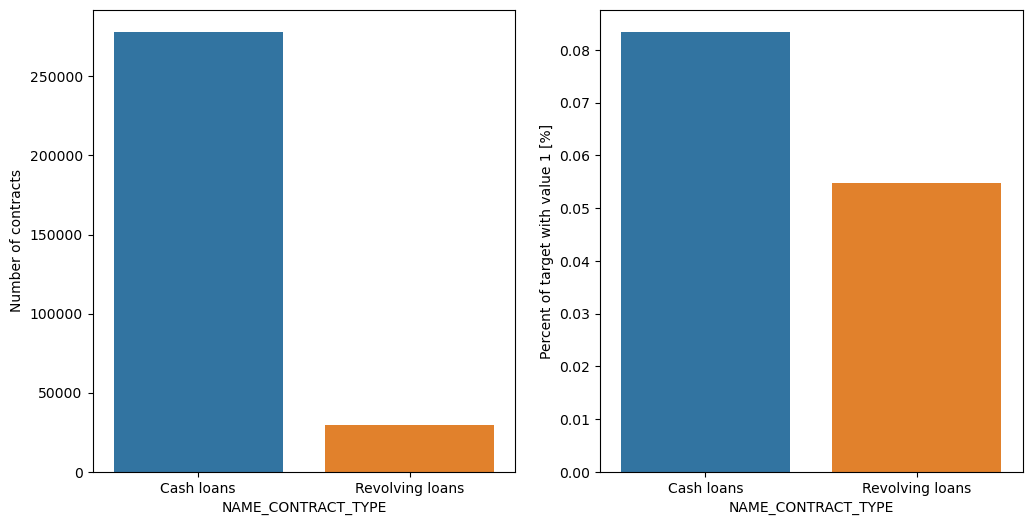

In [47]:
plot_stats('NAME_CONTRACT_TYPE')

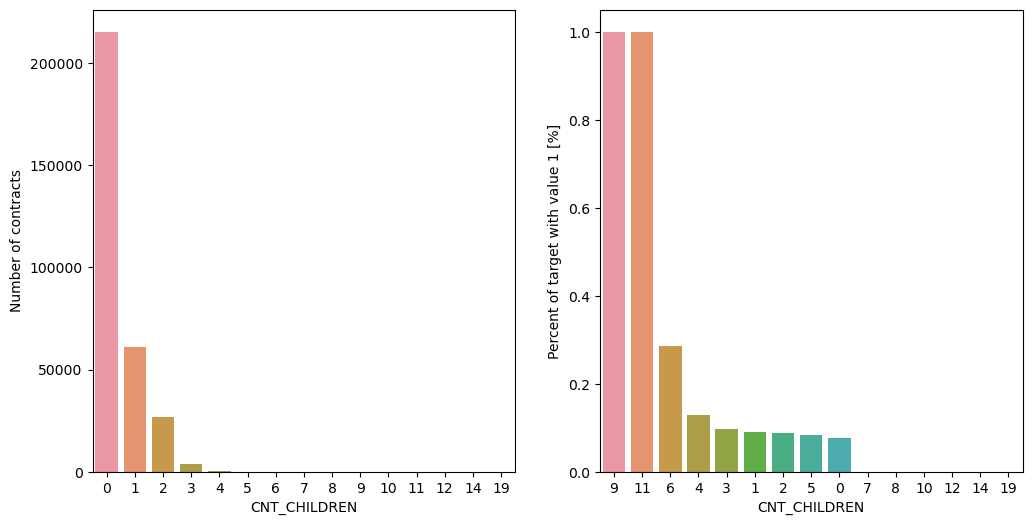

In [48]:
plot_stats('CNT_CHILDREN')

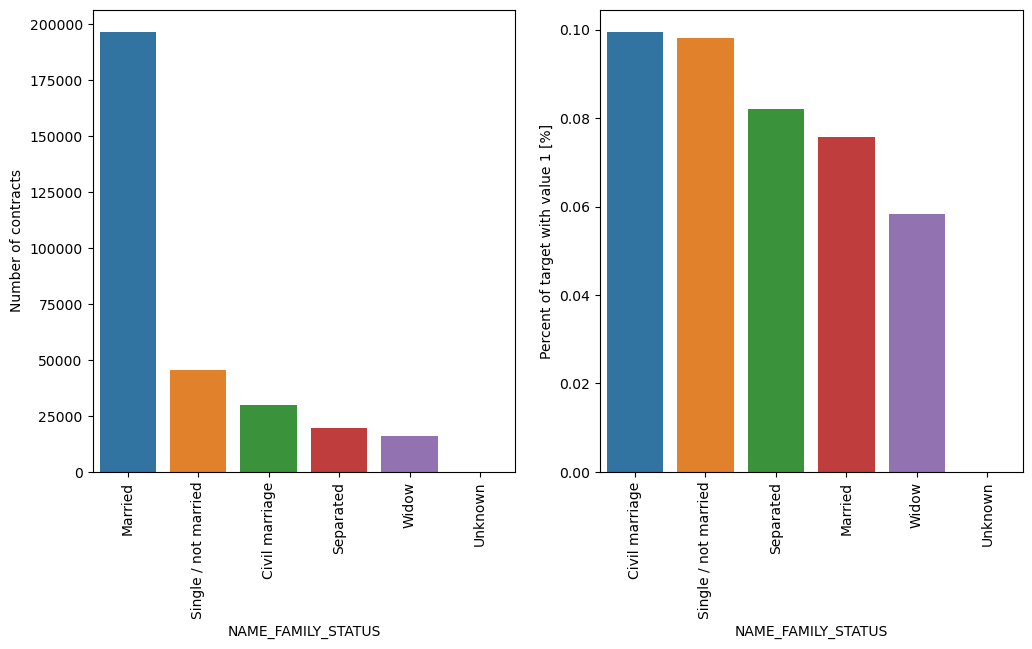

In [49]:
plot_stats('NAME_FAMILY_STATUS',True, True)

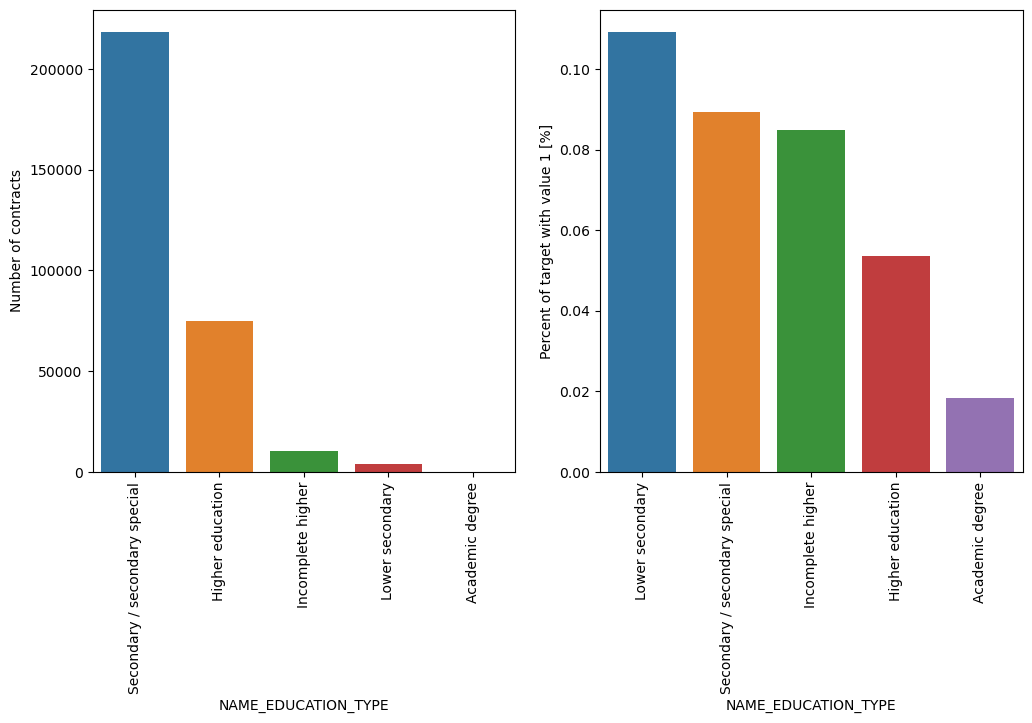

In [50]:
plot_stats('NAME_EDUCATION_TYPE',True)

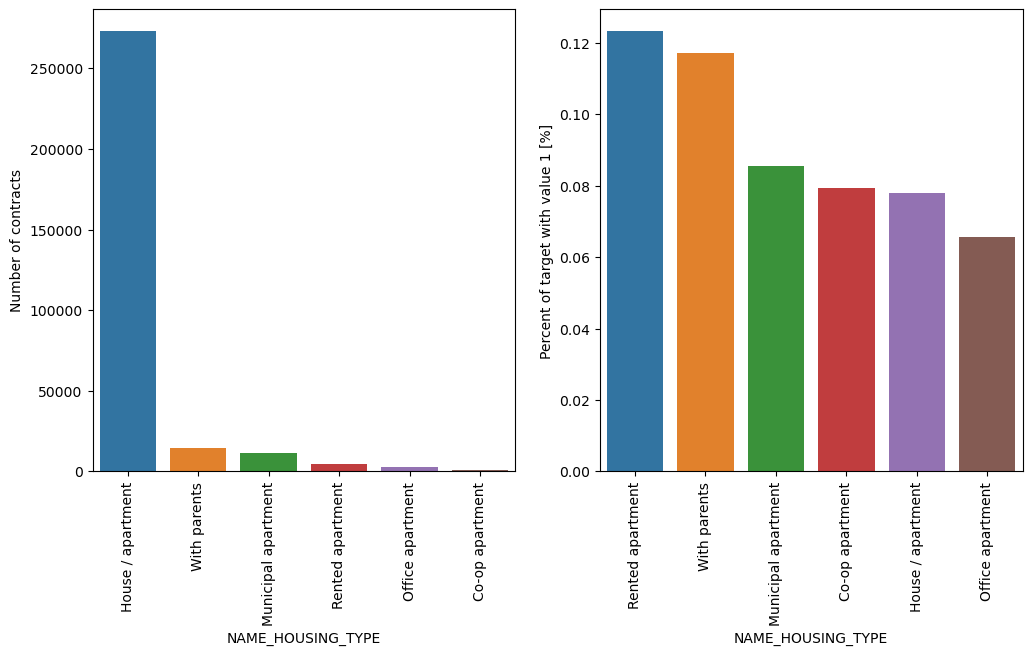

In [51]:
plot_stats('NAME_HOUSING_TYPE',True)

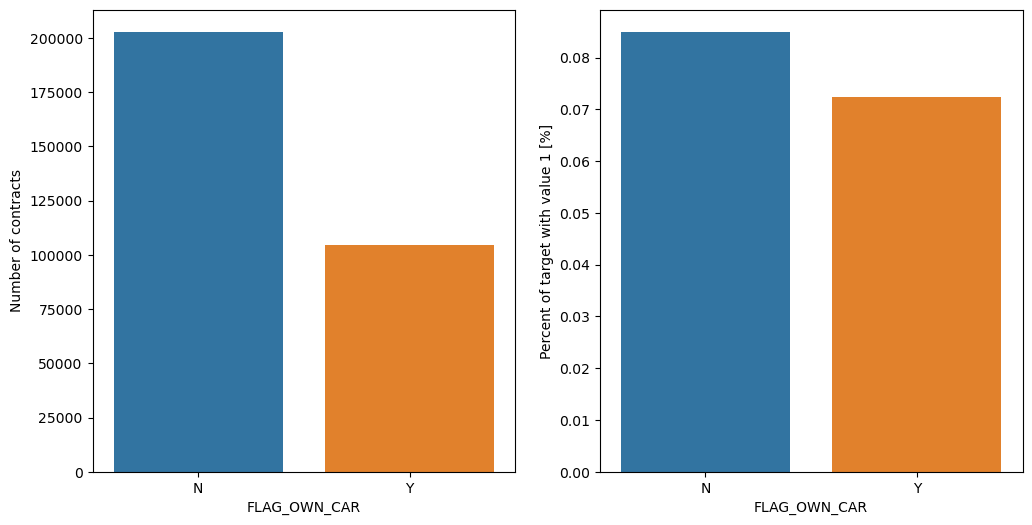

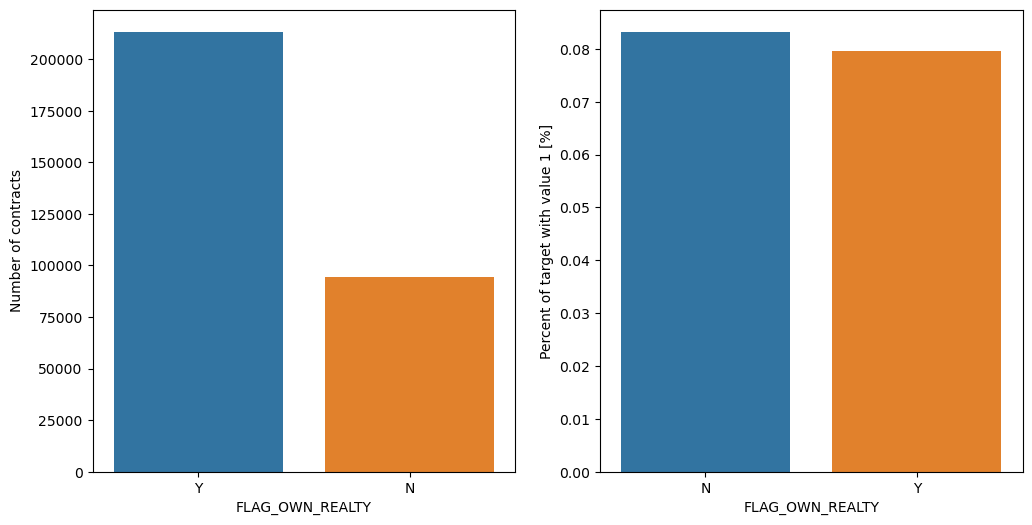

In [52]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

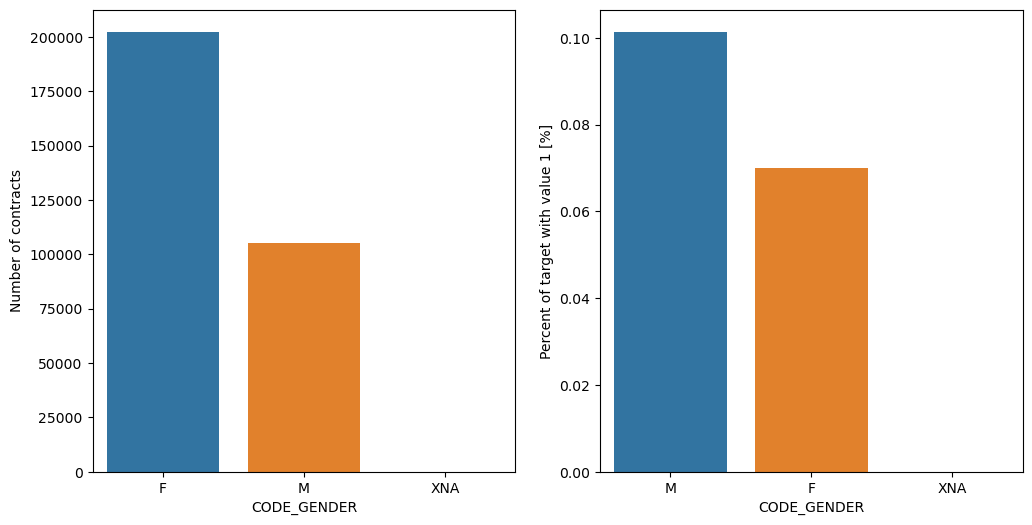

In [53]:
plot_stats('CODE_GENDER')

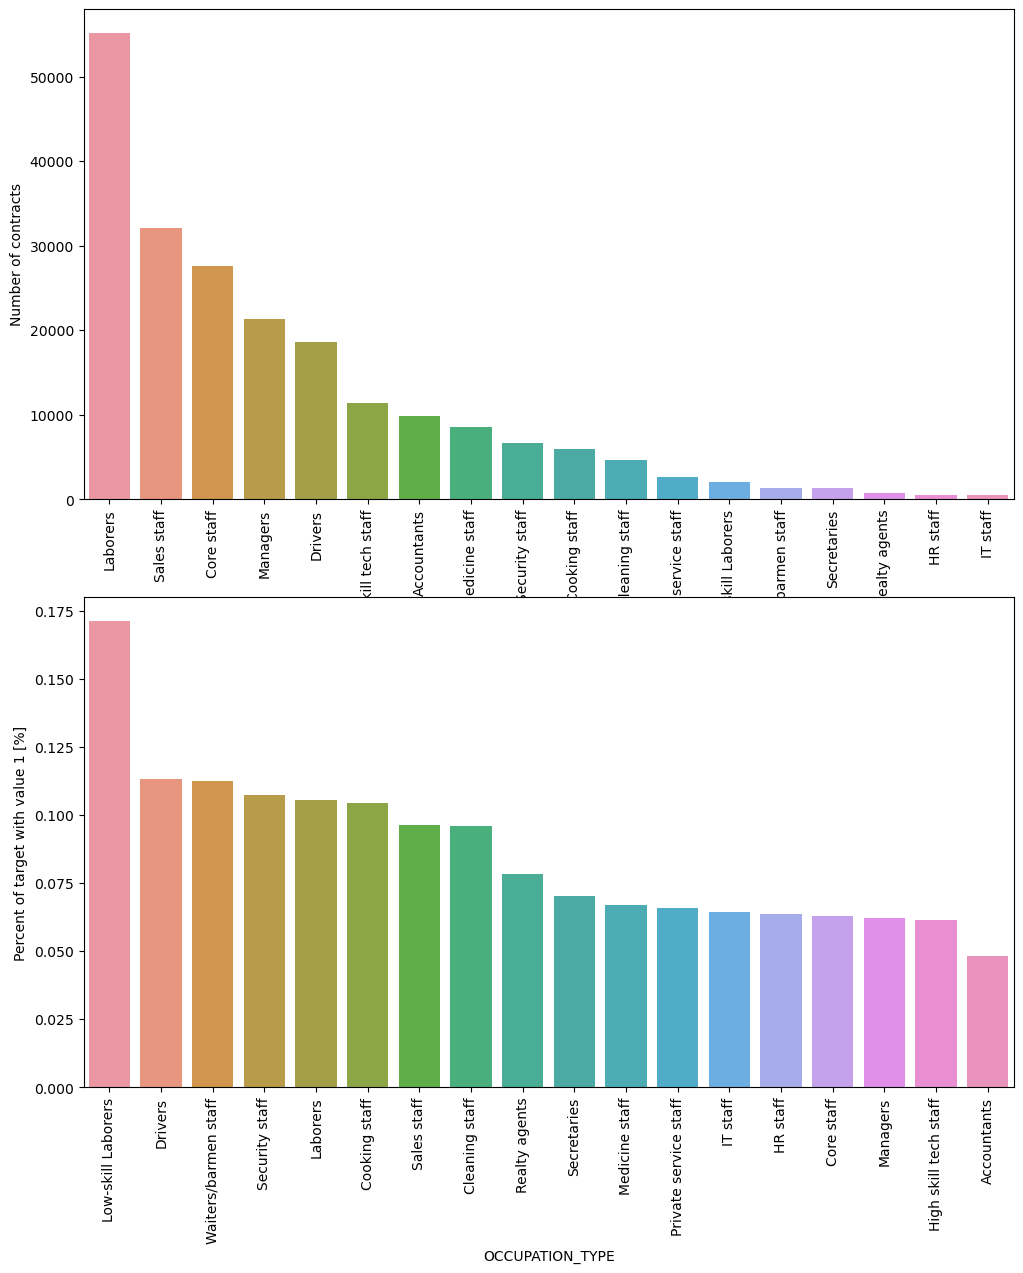

In [54]:
plot_stats('OCCUPATION_TYPE',True, False)

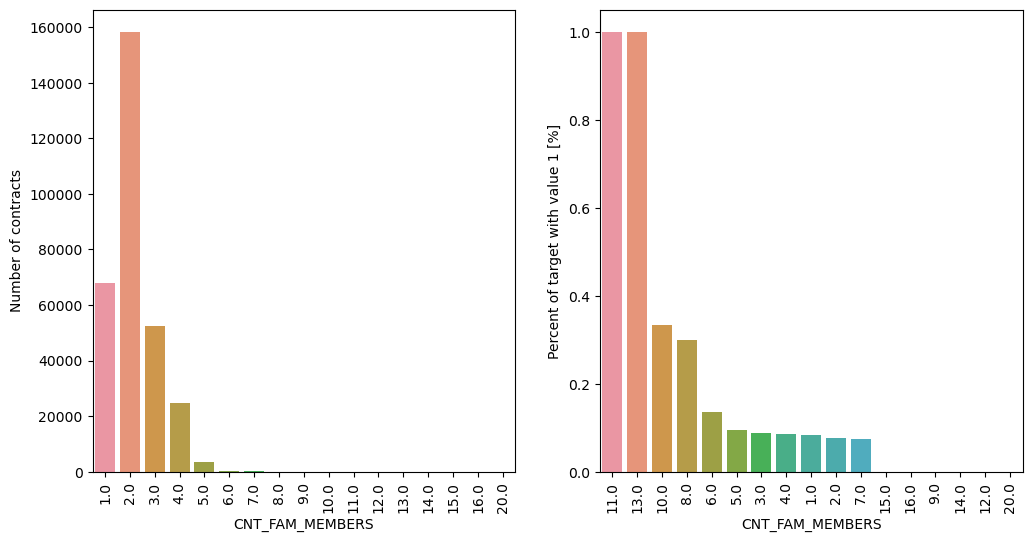

In [55]:
plot_stats('CNT_FAM_MEMBERS',True)

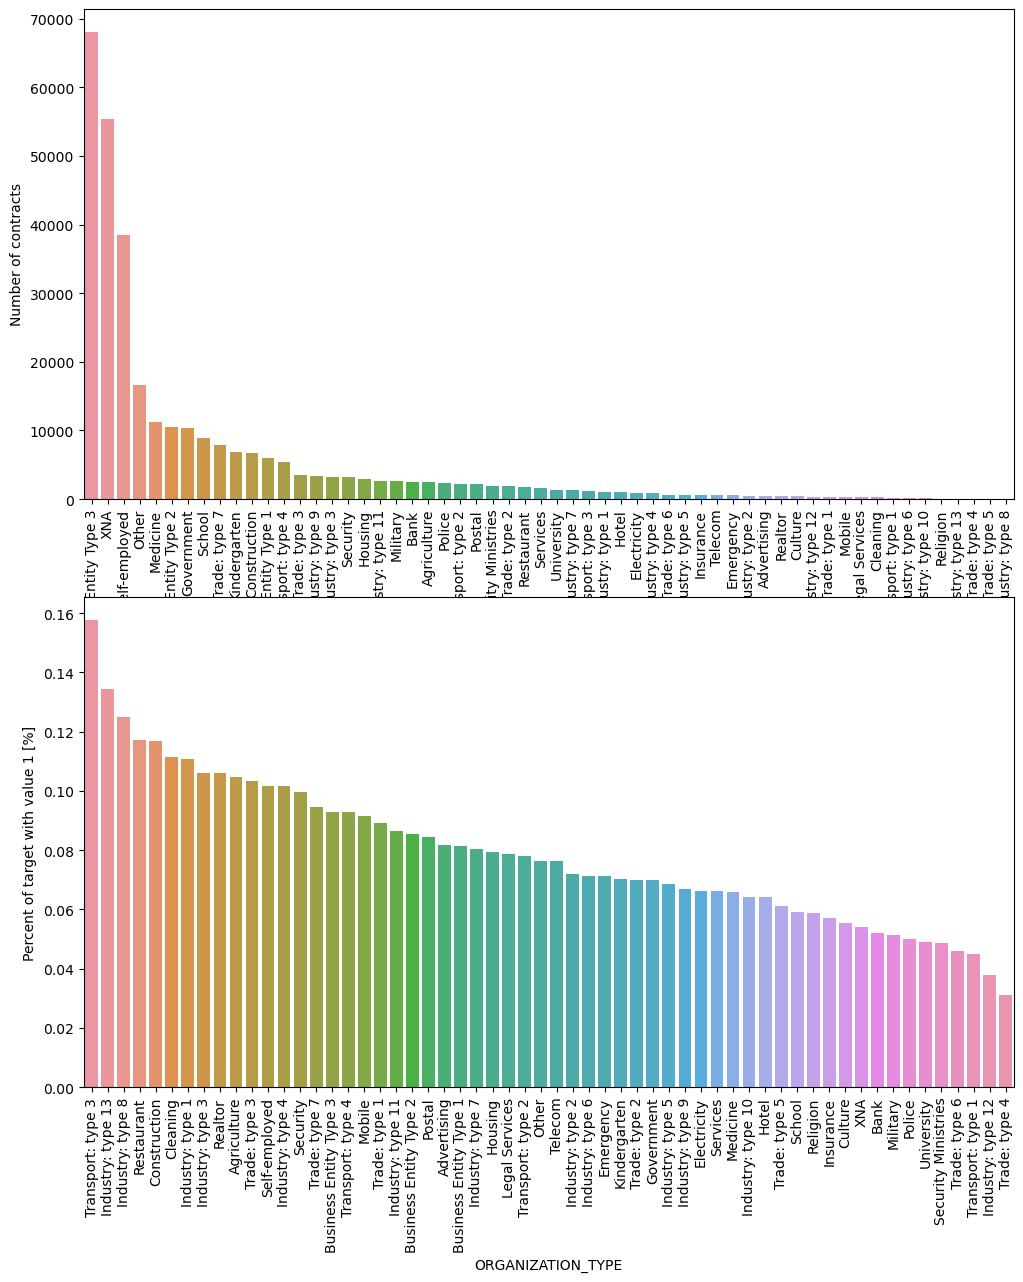

In [56]:
plot_stats('ORGANIZATION_TYPE',True, False)

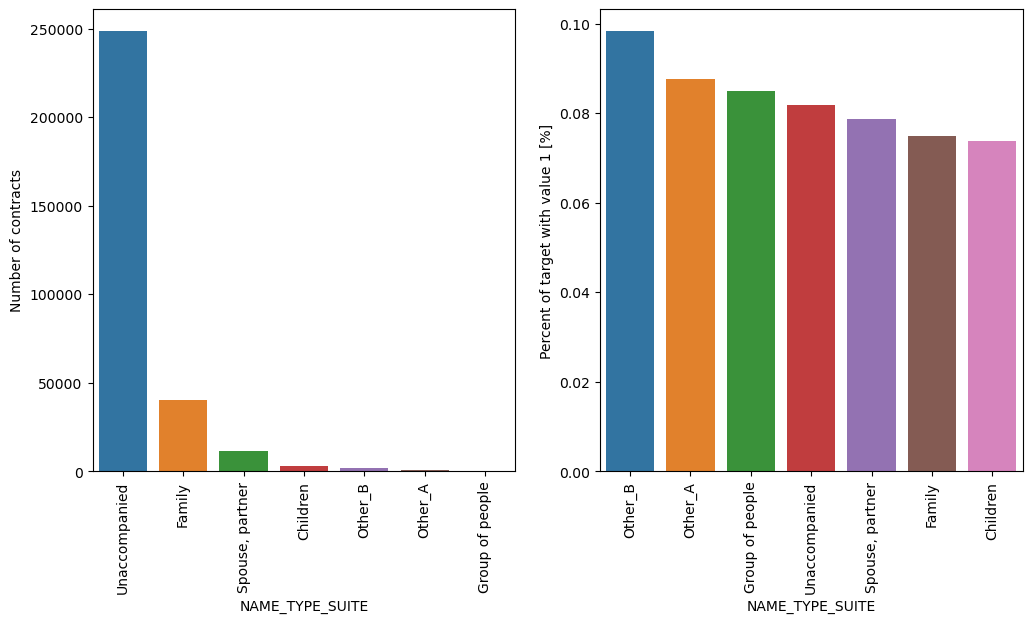

In [57]:
plot_stats('NAME_TYPE_SUITE',True)

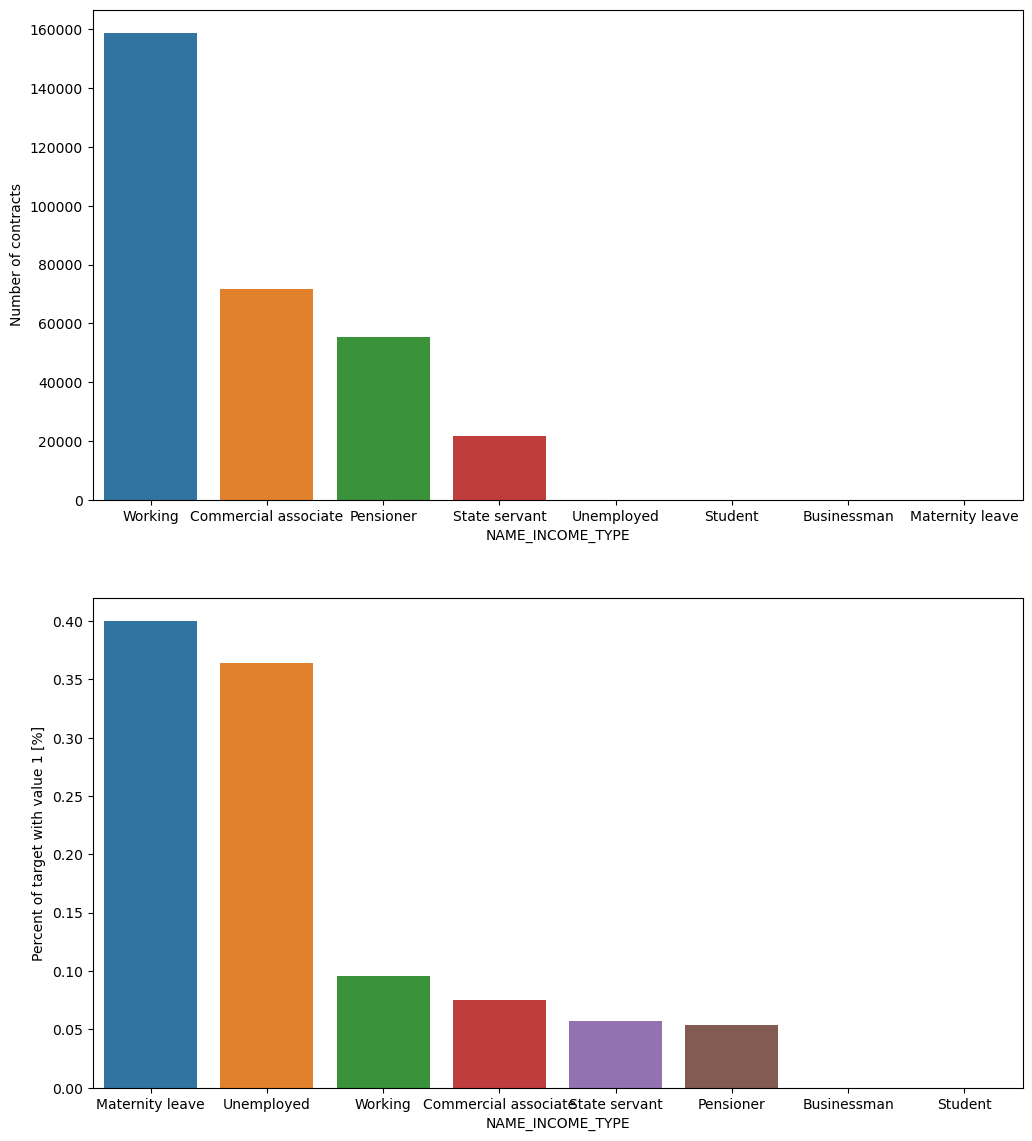

In [58]:
plot_stats('NAME_INCOME_TYPE',False,False)

In [64]:
# Plot distribution of one feature
def plot_distribution(feature,color):
    plt.figure(figsize=(10,6))
    plt.title("Distribution of %s" % feature)
    sns.displot(record[feature].dropna(),color=color, kde=True,bins=100)
    plt.show()

In [65]:
# Plot distribution of multiple features, with TARGET = 1/0 on the same graph
def plot_distribution_comp(var,nrow=2):
    
    i = 0
    t1 = record.loc[record['TARGET'] != 0]
    t0 = record.loc[record['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(nrow,2,figsize=(12,6*nrow))

    for feature in var:
        i += 1
        plt.subplot(nrow,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

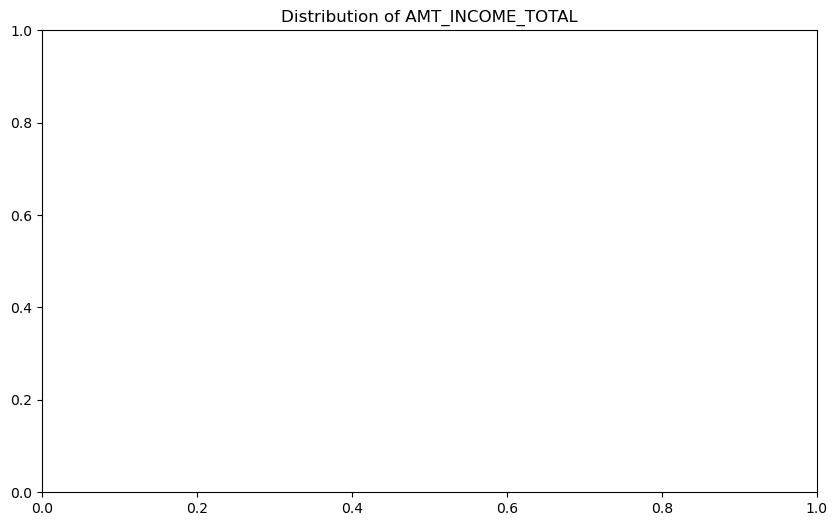

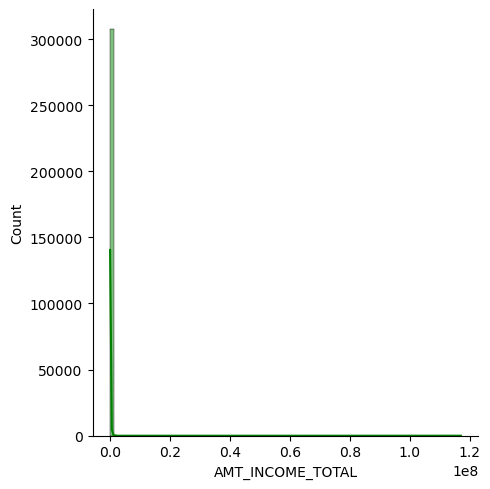

In [66]:
plot_distribution('AMT_INCOME_TOTAL','green')

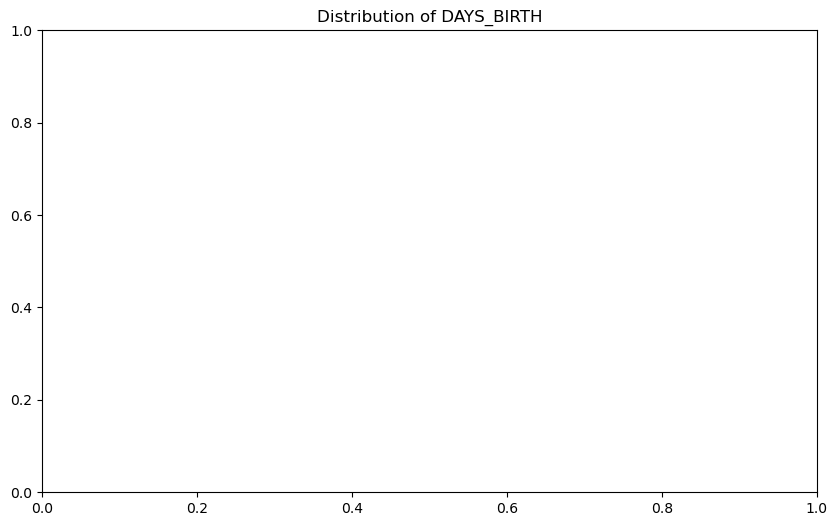

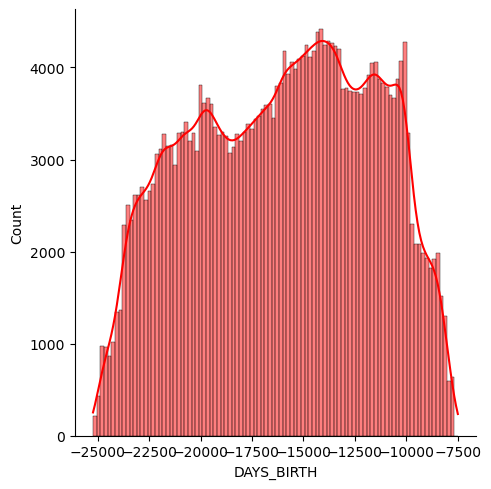

In [67]:
plot_distribution('DAYS_BIRTH','red')

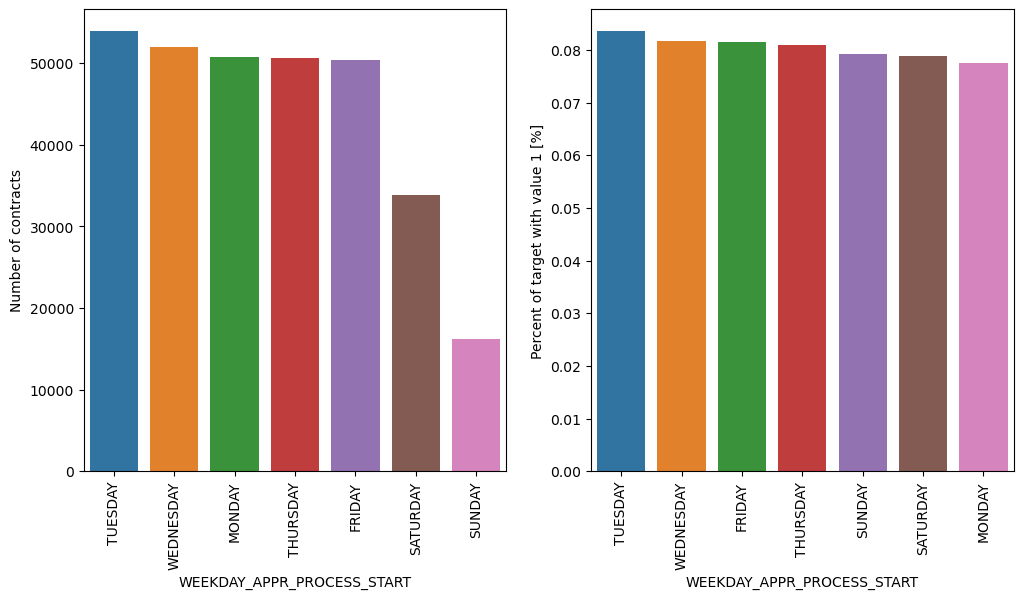

In [68]:
plot_stats('WEEKDAY_APPR_PROCESS_START','brown')

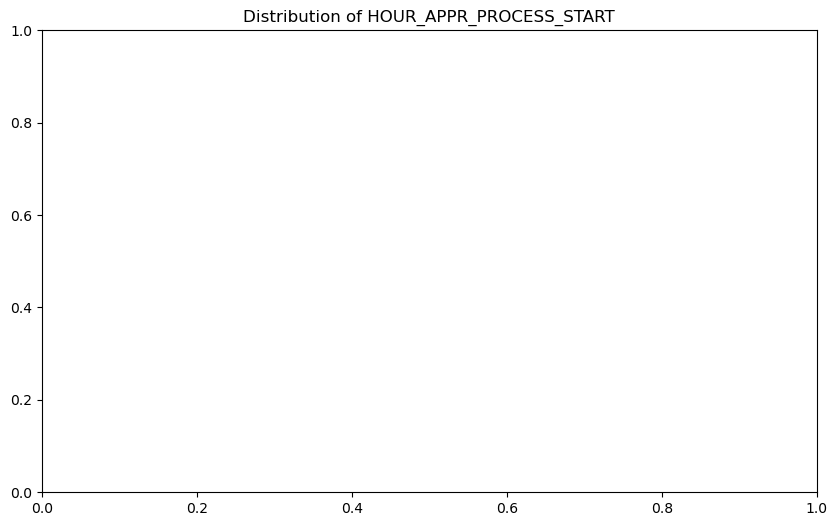

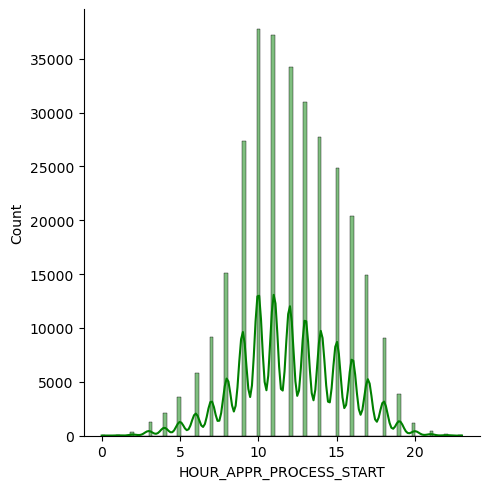

In [69]:
plot_distribution('HOUR_APPR_PROCESS_START','green')